<a href="https://colab.research.google.com/github/arnabmy/stock-research/blob/main/stock_buy_signal_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
install.packages('quantmod')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘zoo’, ‘TTR’




In [3]:
install.packages('tidyverse')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
library(tidyverse)
library(quantmod)

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Attaching package: ‘xts’


The following objects are masked from ‘package:dplyr’:

    first, last


Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [5]:
#Pull down Stock Data
AMZN <- getSymbols("AMZN", auto.assign = F)

‘getSymbols’ currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
‘loadSymbols’ to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.




In [6]:
#Store Closing Price (adjusted for stock splits)
price <- AMZN$AMZN.Adjusted # close price 

In [7]:
r <- price/Lag(price) - 1
r

           AMZN.Adjusted
2007-01-03            NA
2007-01-04  5.167984e-03
2007-01-05 -1.362476e-02
2007-01-08 -2.267394e-02
2007-01-09  7.466640e-03
2007-01-10 -1.667541e-02
2007-01-11  6.729475e-03
2007-01-12  2.139035e-02
2007-01-16  1.204186e-02
2007-01-17 -2.017587e-02
2007-01-18 -2.375927e-02
2007-01-19  1.081666e-03
2007-01-22 -1.890843e-03
2007-01-23 -1.407310e-02
2007-01-24  2.278337e-02
2007-01-25 -4.830811e-03
2007-01-26 -6.202912e-03
2007-01-29  1.573954e-02
2007-01-30 -1.015231e-02
2007-01-31  1.673412e-02
2007-02-01  2.734279e-02
2007-02-02 -3.385018e-02
2007-02-05 -6.151351e-03
2007-02-06  2.987083e-02
2007-02-07  1.855239e-02
2007-02-08  3.078450e-03
2007-02-09 -9.718594e-03
2007-02-12  3.357360e-03
2007-02-13  1.184049e-02
2007-02-14  2.111417e-02
2007-02-15 -1.992975e-03
2007-02-16  6.739915e-03
2007-02-20  2.925852e-02
2007-02-21 -6.022645e-03
2007-02-22 -6.301454e-03
2007-02-23 -5.365878e-03
2007-02-26  2.452232e-03
2007-02-27 -5.014675e-02
2007-02-28  7.983440e-03


In [8]:
#remove scientific notation
options(scipen = 9999)

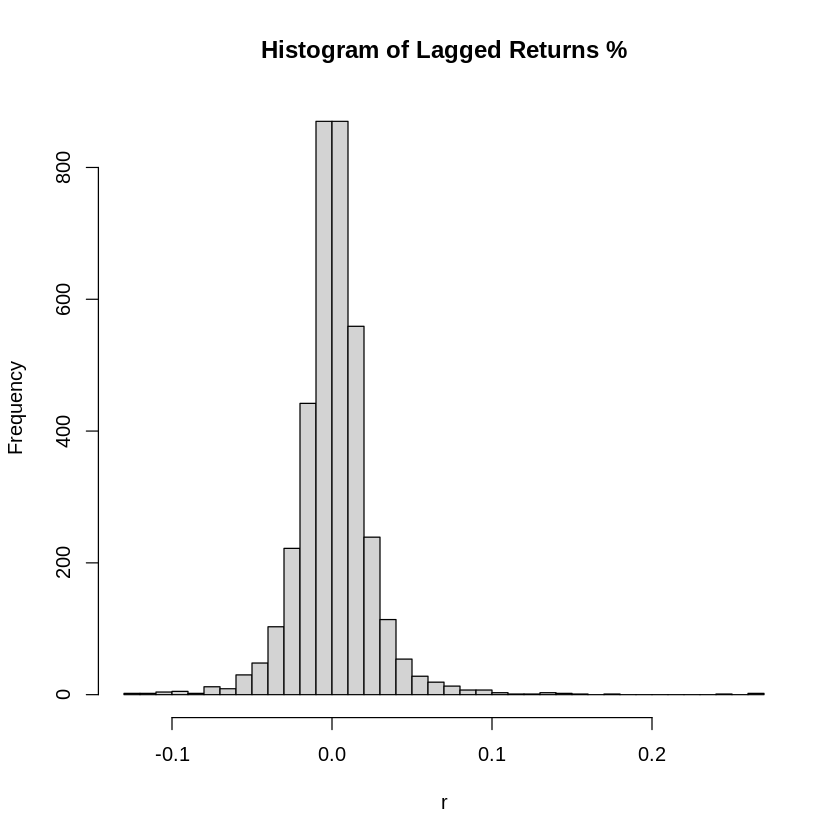

In [9]:
#Look at Histogram of Percentage Change
hist(r, breaks = 30, main = "Histogram of Lagged Returns %")

In [10]:
# % price change
delta <-0.0075#threshold
signal <-c(0) # first date has no signal

In [11]:
#Loop over all trading days (except the first)
for (i in 2: length(price)){
  if (r[i] > delta){
    signal[i]<- 1
  } else
    signal[i]<- 0
}

In [12]:
#Reclassify signal to an xts object (tying it to a date)
signal <- reclass(signal,price)

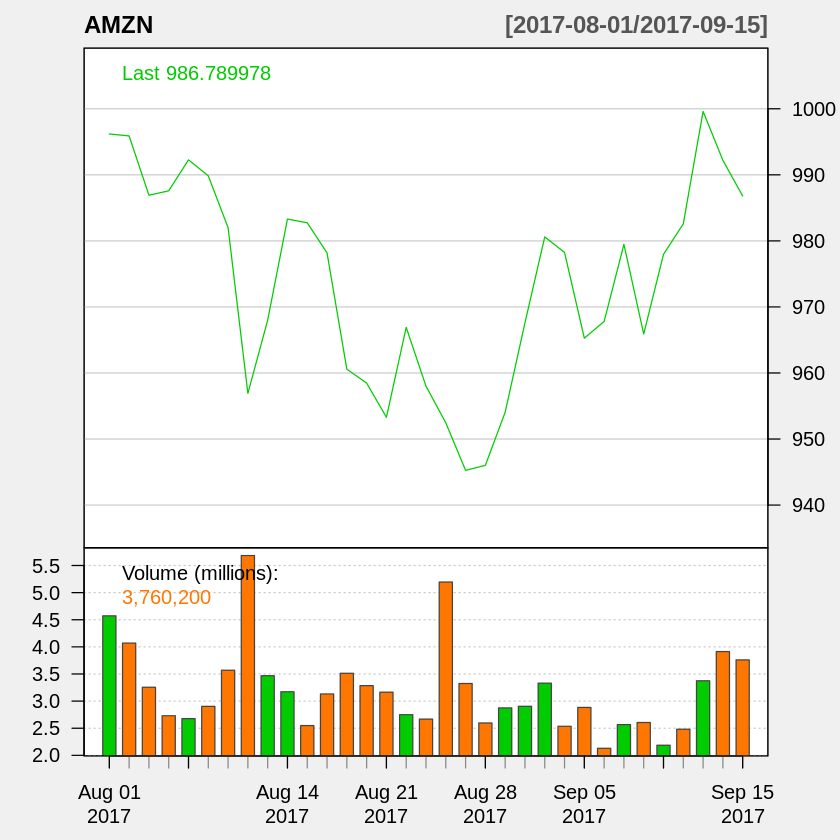

In [13]:
#Chart the Series
chartSeries(AMZN,
            type = 'line',
            subset="2017-08::2017-09-15",
            theme=chartTheme('white'))


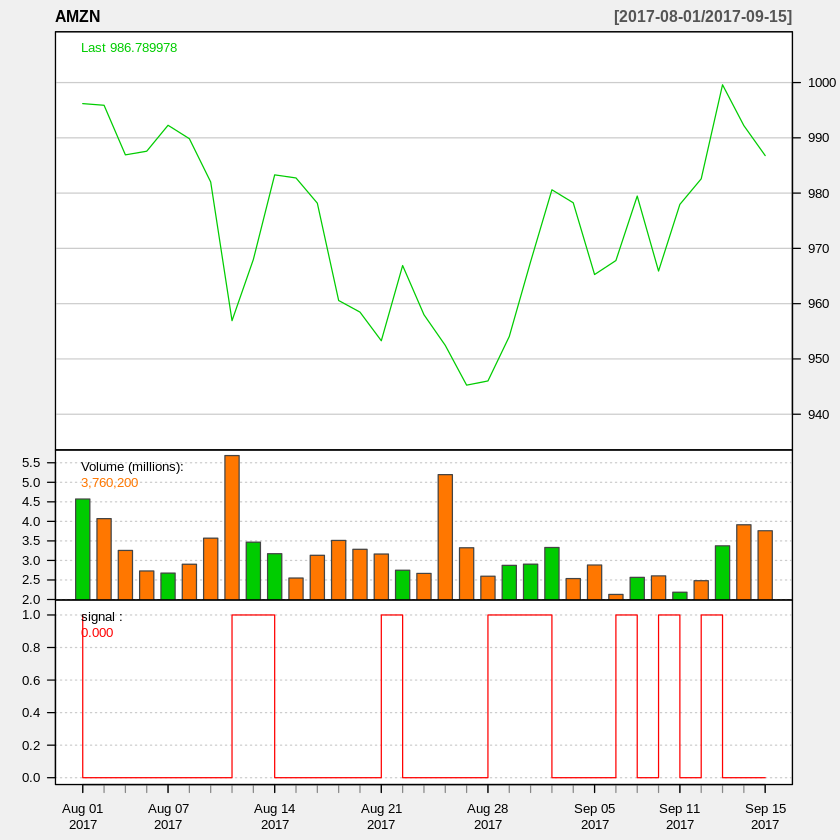

In [14]:
#Add signal line to see how the model performs
addTA(signal,type='S',col='red')
